<a href="https://colab.research.google.com/github/GodfreyAchu/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python implementation of KNN algorithm

In [ ]:
%pip install chart_studio

     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=6cf4599e7f7158dbc63bf6ea90fe9cd4e2170763df6463b51e558516d2e6d03f
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
# importing the required modules for data visualization
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyoff
import pandas as pd

# importing the dats set
data = pd.read_csv('KNN_Data.csv')

# counting the total output data from purchased column
target_balance = data['Purchased'].value_counts().reset_index()

# dividing the output classes into two sections
target_class = go.Bar(
    name = 'Target Balance',
    x = ['Not-Purchased', 'Purchased'],
    y = target_balance['Purchased']
)

# ploting the output classes
fig = go.Figure(target_class)
pyoff.iplot(fig)

In [ ]:
# importing the required modules
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Import the data set for KNN algorithm
dataset = pd.read_csv('KNN_Data.csv')

# storing the input values in the X variable
X = dataset.iloc[:,[0,1]].values

# storing all the ouputs in y variable
y = dataset.iloc[:,2].values

We have imported the dataset and then stored all the data (input) except the last column to the X variable. The last column contains outputs, and we need to exclude them from the input. The data from the last column (output) is stored in the y variable.

To have the ability to test the accuracy of our model later, let’s split our data into training (70%) and testing (30%) datasets:

In [ ]:
# importing the train_test_split method from sklearn
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

The next step is to scale the features data.

Feature scaling is a technique to standardize the independent features present in the data in a fixed range. If feature scaling is not done, a Machine Learning algorithm will assume larger values to have more weight and smaller values to have less weight, regardless of the unit of measurement.

In [ ]:
# applying standard scale method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# scaling training and testing data set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Once the data scaling is done, we can then feed the training data to the KNN algorithm to train our model.

In [ ]:
# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=3 )

# model training
classifer.fit(X_train,y_train)

# testing the model
y_pred= classifer.predict(X_test)

Note: we provide both the inputs and outputs of the training dataset to train the model. After the training part, we provide the inputs of the testing data and stores the predicted output in a variable y_pred. Once we have the predicted outputs, we can then check the accuracy of the trained model.

In [ ]:
# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
print(accuracy_score(y_test,y_pred))

0.9083333333333333


# **This shows that the accuracy of our model is 84%, which is pretty good.**

# How to select K value?

Instead of randomly choosing the K-value, we can use error curves to get the optimal K-value. You need to look for a function minimum for the train data.

**Let’s ploterror curves:**

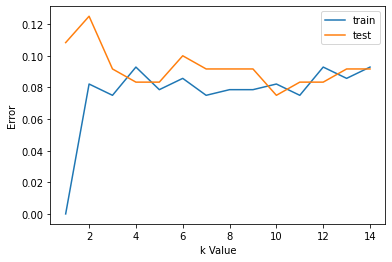

In [ ]:
# Importing the numpy modlule
import numpy as np

# creating sets for errors
error1= []
error2= []

# for loop
for k in range(1,15):
    # using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)

    # stroring the errors
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))

# ploting the graphs for testing and training
plt.plot(range(1,15), error1, label="train")
plt.plot(range(1,15), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

**Based on the above graph, our trained model will give an optimal solution when the K = 4.**

In [ ]:

# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 4
classifer = KNeighborsClassifier(n_neighbors=4)

# model training
classifer.fit(X_train, y_train)

# testing the model
y_pred= classifer.predict(X_test)

# importing accuracy_score
from sklearn.metrics import accuracy_score

# printing accuracy
print(accuracy_score(y_test, y_pred))

0.9166666666666666


# **This time the accuracy has increased and given us 85.8% accurate results. But for the best practice, we should not use any even number for the K value because it can sometimes give strange results.**

[[75  4]
 [ 6 35]]


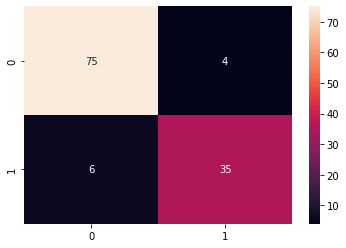

In [ ]:
# importing seaborn
import seaborn as sns

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)

# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')
print(cm)

In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

# finding the whole report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        79
           1       0.90      0.85      0.88        41

    accuracy                           0.92       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



Text(0, 0.5, 'Error Rate')

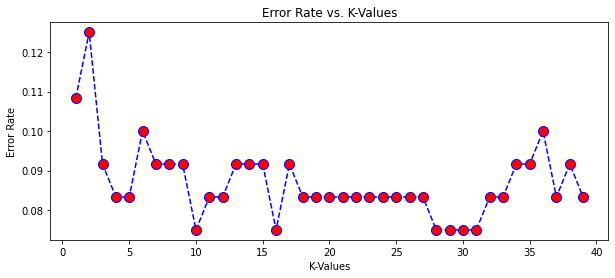

In [ ]:
# import numpy
import numpy as np
error_rate = []

# searching k value upto  40
for i in range(1,40):
    # knn algorithm
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    # testing the model
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')